In [4]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import sys
import pandas as pd
import gzip
import seaborn as sns
import string
from time import time
import nltk
from nltk.corpus import stopwords 

In [5]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from  nltk.stem import SnowballStemmer
from nltk import wordnet
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mayabridgman/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
def make_confusion_matrix(cf,group_names=None,categories='auto',count=True,percent=True,cbar=True,xyticks=True,xyplotlabels=True,sum_stats=True,figsize=None,cmap='Blues',title=None):
    
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)


In [7]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mayabridgman/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [8]:
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [9]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [10]:
df = pd.read_json('/Users/mayabridgman/Documents/fashion_classifier/AMAZON_FASHION.json',lines=True)

In [11]:
df.shape

(883636, 12)

In [12]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                pass
                # tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [13]:
df.reviewText = df.reviewText.apply(lambda x: preprocess(x))

In [73]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,exactly needed,perfect replacements!!,1413763200,NaN,NaN,NaN
1,2,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,agree review opening small almost bent hook ex...,"I agree with the other review, the opening is ...",1411862400,3.0,NaN,NaN
2,4,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,love going order another pack keep work someon...,My New 'Friends' !!,1408924800,NaN,NaN,NaN
3,2,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,tiny opening,Two Stars,1408838400,NaN,NaN,NaN
4,3,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,okay,Three Stars,1406419200,NaN,NaN,NaN


In [14]:
def normalization(sentence):
    sWords = stopwords.words('english')

    tokens = word_tokenize(sentence)
    new_words = [word.lower() for word in tokens if word not in sWords]
  #  new_words = [stemmer.stem(word) for word in new_words]
    return new_words

In [15]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mayabridgman/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mayabridgman/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
df['reviewText'] = df.reviewText.apply(normalization)

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [19]:
nb = Pipeline([('vectorize', CountVectorizer(ngram_range=(1, 2))), ('tfidf', TfidfTransformer()),('clf', MultinomialNB())])

In [20]:
sgd = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),('tfidf', TfidfTransformer()),('clf', SGDClassifier())])

In [21]:
logreg = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),('tfidf', TfidfTransformer()),('clf', LogisticRegression(max_iter=500))])

In [22]:
df.reviewText = df.reviewText.apply(' '.join)

In [23]:
x = df['reviewText']
y = df['overall']
# stratify makes sure every class gets spread out
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state = 44)

In [24]:
X_train

755852                                  love ring beautiful
821661                                    tight around bust
475473                                                  fit
698123    shoulder cutouts small look stupid sleeves tig...
652877    stretchy much support working ok lounging love...
                                ...                        
575363                        perfect keep ears warm drafts
430056             wife likes could slightly better quality
532313                                beautiful comfortable
220828                 nice hat soft roomy warm covers ears
28651     somewhat helpful anyone needs extra support wo...
Name: reviewText, Length: 706908, dtype: object

In [25]:
X_test

866484    wish read previous review item spot screen pri...
465114    5 2 120lbs 34c fits like glove however side bo...
356920     lovely quality price perfect son science project
749174                              gave someone else small
72016     short 5 3 comfy summer lounging around bit roo...
                                ...                        
421574    careful buy band shirts created equal shoot tr...
675649                                            beautiful
595036    beautiful scarf feels great although silk stil...
730908    hesitant purchase clothing usually fits smalle...
495043                                           advertised
Name: reviewText, Length: 176728, dtype: object

In [28]:
y_train

755852    5
821661    2
475473    1
698123    1
652877    4
         ..
575363    5
430056    4
532313    5
220828    5
28651     4
Name: overall, Length: 706908, dtype: int64

In [29]:
# Naive Bayes
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(accuracy_score(y_test, y_pred_nb))
cfm_nb = confusion_matrix(y_test, y_pred_nb)
print(confusion_matrix)
print(classification_report(y_test, y_pred_nb))

0.5699832510977321
<function confusion_matrix at 0x7f9a22c43680>
              precision    recall  f1-score   support

           1       0.76      0.33      0.46     21416
           2       1.00      0.00      0.00     12944
           3       0.50      0.02      0.03     19406
           4       0.46      0.01      0.03     29866
           5       0.56      1.00      0.72     93096

    accuracy                           0.57    176728
   macro avg       0.66      0.27      0.25    176728
weighted avg       0.59      0.57      0.44    176728



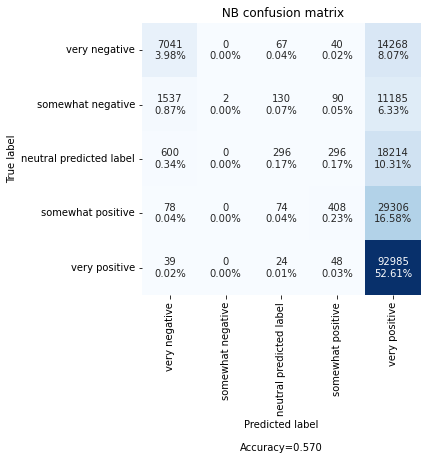

In [90]:
categories = ['very negative','somewhat negative','neutral predicted label','somewhat positive','very positive']
make_confusion_matrix(cfm_nb, figsize=(5,5), categories=categories, cbar=False, title=' NB confusion matrix')

In [94]:
y_pred_sgd

array([1, 3, 5, ..., 5, 5, 5])

In [30]:
# SGD Classifier
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
print(accuracy_score(y_test, y_pred_sgd))
cfm_sgd = confusion_matrix(y_test.tolist(), y_pred_sgd.tolist())
print(cfm_sgd)
print(classification_report(y_test, y_pred_sgd))


0.6262165587795935
[[14436   154   370   178  6278]
 [ 5644   319   783   516  5682]
 [ 3752   320  1848  1975 11511]
 [ 1058   150   884  2677 25097]
 [  534    45   235   892 91390]]
              precision    recall  f1-score   support

           1       0.57      0.67      0.62     21416
           2       0.32      0.02      0.05     12944
           3       0.45      0.10      0.16     19406
           4       0.43      0.09      0.15     29866
           5       0.65      0.98      0.78     93096

    accuracy                           0.63    176728
   macro avg       0.48      0.37      0.35    176728
weighted avg       0.56      0.63      0.53    176728



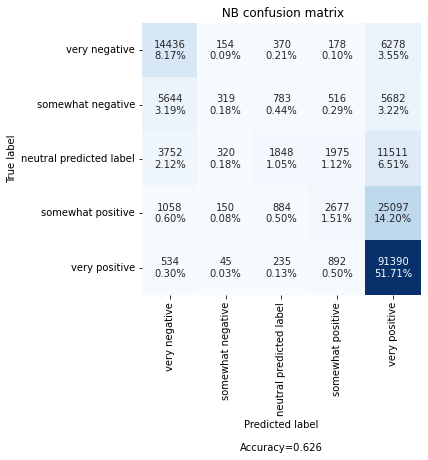

In [31]:
categories = ['very negative','somewhat negative','neutral predicted label','somewhat positive','very positive']
make_confusion_matrix(cfm_sgd, figsize=(5,5), categories=categories, cbar=False, title=' NB confusion matrix')

In [65]:
logreg

Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(max_iter=500))])

In [32]:
# Logistic Regression
logreg.fit(X_train[:10], y_train[:10])
y_pred_log = logreg.predict(X_test)
print(accuracy_score(y_test, y_pred_log))
cfm_logreg = confusion_matrix(y_test, y_pred_log)
print(cfm_logreg)
print(classification_report(y_test, y_pred_log))

0.5198044452491966
[[ 2238     0     0     0 19178]
 [ 1213     0     0     0 11731]
 [ 1492     0     0     0 17914]
 [ 1919     0     0     0 27947]
 [ 3470     0     0     0 89626]]
              precision    recall  f1-score   support

           1       0.22      0.10      0.14     21416
           2       0.00      0.00      0.00     12944
           3       0.00      0.00      0.00     19406
           4       0.00      0.00      0.00     29866
           5       0.54      0.96      0.69     93096

    accuracy                           0.52    176728
   macro avg       0.15      0.21      0.17    176728
weighted avg       0.31      0.52      0.38    176728



/Users/mayabridgman/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mayabridgman/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mayabridgman/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

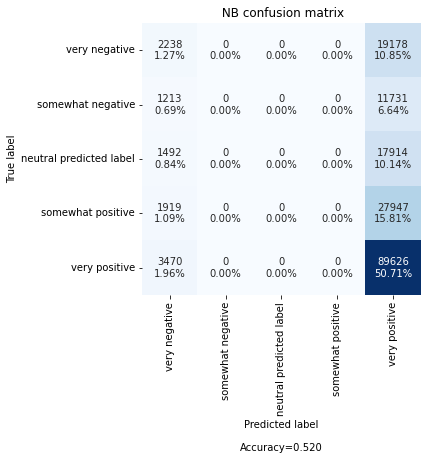

In [33]:
categories = ['very negative','somewhat negative','neutral predicted label','somewhat positive','very positive']
make_confusion_matrix(cfm_logreg, figsize=(5,5), categories=categories, cbar=False, title=' NB confusion matrix')

# SGD confusion matrix

In [56]:
cf = np.array([[14660,   245,   368,   180,  5963],
 [ 5773,   418,   764,  501,  5488],
 [ 3750,   482,  1894,  1969, 11311],
 [ 1087,   216,  1007,  2741, 24815],
 [  594,    73,   394,   941, 91094]])

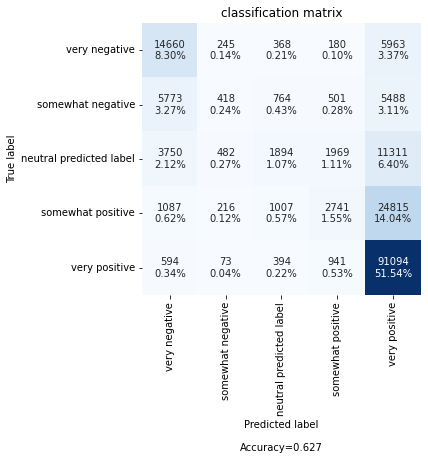

In [62]:
categories = ['very negative','somewhat negative','neutral predicted label','somewhat positive','very positive']
make_confusion_matrix(cf, figsize=(5,5), categories=categories, cbar=False, title=' SGD confusion matrix')